## 📝 Task List

- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - graphics demonstrate the characteristics of data  
  - graphics show two or more variables to represent the relationship between features
  - Describe findings
- Definition of a metric for the business to monitor  
- Final summary including recommendations that the business should undertake

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
sales = pd.read_csv('product_sales.csv')
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [4]:
sales[sales['years_as_customer']>39]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [5]:
sales['years_as_customer'] = sales.apply(lambda row: 39 if row['years_as_customer'] > 39 else row['years_as_customer'], axis=1)

Because Pens and Printers aged 39 years but in Column 'years_as_customer' has 2 values exceeds 39, so I opt to replace those values with the max value of the column (39).

In [6]:
sales['sales_method'].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

Column 'sales_method' including 5 unique values with inconsistencies, this problem was solved by cutting down from 5 to 3 consistent values: 'email + call','call', and 'email' with 2 steps.

In [7]:
sales['sales_method'] = sales['sales_method'].str.lower()

Firstly, lowercase all character in each value.

In [8]:
sales['sales_method'] = sales['sales_method'].str.replace("em ","email ")

 Secondly, in each value of 'sales_method' column, if it contains 'em' string, replace it by 'email'.

In [9]:
sales['sales_method'].unique()

array(['email', 'email + call', 'call'], dtype=object)

In [10]:
missing_percent = 100* len(sales[sales['revenue'].isnull()]) / len(sales)
print(missing_percent)

7.16


In [11]:
sales_missing = sales[sales['revenue'].isnull()]
sales_non_missing = sales[~sales['revenue'].isnull()]

In [12]:
sales_non_missing['sales_method'].value_counts()

email           6922
call            4781
email + call    2223
Name: sales_method, dtype: int64

In [13]:
sales_missing['sales_method'].value_counts()

email           544
email + call    349
call            181
Name: sales_method, dtype: int64

In [14]:
sales['revenue'].isnull().sum()

1074

In [15]:
subdf = sales.groupby('sales_method')['revenue'].median()
print(subdf)

sales_method
call             49.07
email            95.58
email + call    184.74
Name: revenue, dtype: float64


In [16]:
sales['revenue'] = sales.apply(lambda row: subdf[0] if ((np.isnan(row['revenue'])) & (row['sales_method'] == 'call')) else (subdf[1] if ((np.isnan(row['revenue'])) & (row['sales_method'] == 'email')) else(subdf[2] if((np.isnan(row['revenue'])) & (row['sales_method'] == 'email + call')) else row['revenue'])), axis = 1)

Column 'revenue' contains 1074 null values, the solution applied is filling the missing values in each method (email, call, email + call) by the median revenue of that method.

In [17]:
sales['cust_category'] = sales.apply(lambda row: 'less than 1 years' if row['years_as_customer'] < 1 else ('more than 10 years' if row['years_as_customer'] > 10 else '1-10 years'),axis=1)

Creating column 'cust_category' based on their years of being customers of Pens and Printers from column 'years_as_customer', categorized into 3 groups: '<1 year', '1-10 years', '> 10 years'.

In [18]:
sales.groupby('sales_method')['customer_id'].count()

sales_method
call            4962
email           7466
email + call    2572
Name: customer_id, dtype: int64

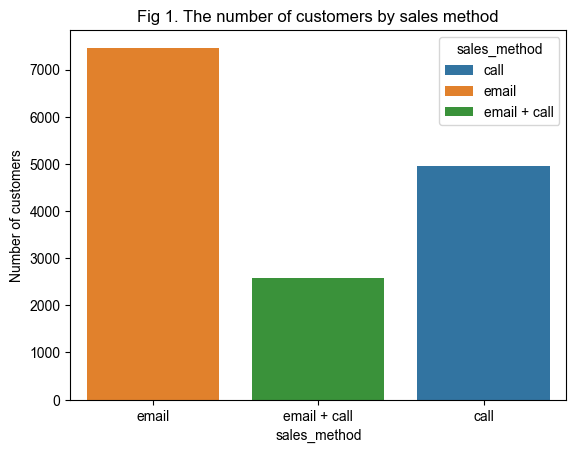

In [19]:
sns.countplot(data=sales, x='sales_method',hue_order=['call', 'email', 'email + call'], hue=sales.sales_method,dodge=False)
plt.title('Fig 1. The number of customers by sales method')
plt.ylabel('Number of customers')
sns.set_style('dark')
plt.show()


The chart shows the number of customers categorized by each approach: 
About a half of total customers, 7466, is announced about new product via email.
Call is the second preferred approach among salesman to contact with customers, with just 4962 customers, whereas the number of customers got new line of product information through combining method is the lowest, about 2572 customers.

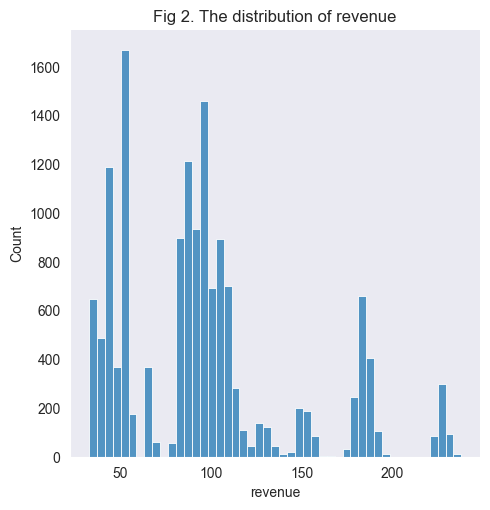

In [20]:
sns.displot(data=sales['revenue'])
plt.title('Fig 2. The distribution of revenue')
plt.show()

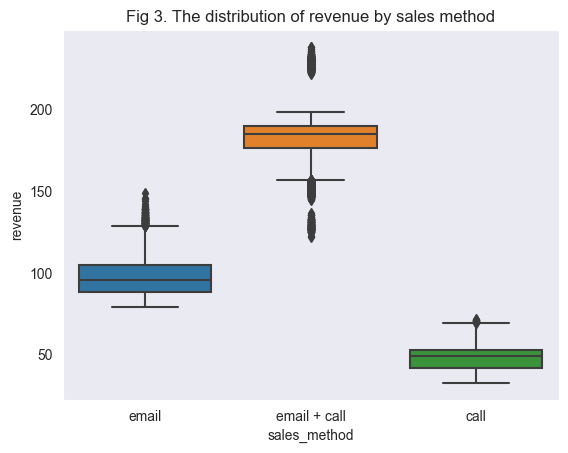

In [21]:
sns.boxplot(data=sales, x='sales_method', y='revenue')
plt.title('Fig 3. The distribution of revenue by sales method')
plt.show()

Fig 2 shows the distribution of revenue of the whole dataset meanwhile Fig 3 illustrates the distribution of revenues by sales methods.
It is worthy to note that the distribution of revenues generated from combining method using both email and call fluctuates at a high range of price, whereas call method seems to have the lowest performance.
In details, as can be seen from the Fig 2, there are some most common revenue values, those are more likely around 49 dollars, 96 dollars, and a peak at 185 dollars, these notes are convinced with visualization in Fig 3 while those values are nearly corresponding with the median amount of money that each customer expensed categorised by call, email, and email + call respectively.

In [22]:
sum_rev_by_med = sales.groupby('sales_method')['revenue'].sum()
print(sum_rev_by_med)

sales_method
call            236445.16
email           724313.35
email + call    472730.95
Name: revenue, dtype: float64


In [23]:
avg_rev_per_customer = sales.groupby('sales_method')['revenue'].mean().reset_index()
print(avg_rev_per_customer)

   sales_method     revenue
0          call   47.651181
1         email   97.014914
2  email + call  183.798970


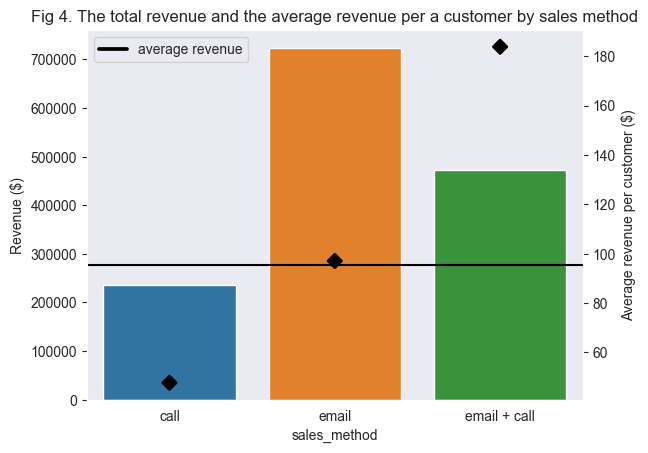

In [24]:
sns.barplot(data=sum_rev_by_med.reset_index(), x='sales_method', y='revenue', estimator='sum')
plt.ylabel('Revenue ($)')
ax2 = plt.twinx()
sns.pointplot(data=avg_rev_per_customer, x='sales_method',y='revenue', ax=ax2, join=False, markers='D', color='black')
ax2.set_ylabel('Average revenue per customer ($)')
plt.title('Fig 4. The total revenue and the average revenue per a customer by sales method')
plt.axhline(sales['revenue'].mean(), color='black')
plt.legend(['average revenue'],loc='upper left')
plt.show()

Despite the combining method using both email + call captures the lowest number of customers (around 2600 in fig 1) but with the second rank in generating revenue (about 473.000 dollars in total), this method turns out to return the highest average revenue per customer (184 dollars/customer). Besides, approximately 7500 customers approaching new line of product by email generates the total revenue about 725.000 dollars,resulting in around 97 dollars/customer while that metric is just approximately 47 dollars/customer with customers who educated about new line of product by calling due to surprisingly low total revenue 237.000 dollars (despite nearly 5000 customers in fig 1).
-There was _average revenue per customer_ metric is used to monitor the business, the higher value of this metric indicates that a customer creates more revenue for the business. Current average revenue of current dataset is around 95 dollars per customer

In [25]:
customer_by_week_med = sales.groupby(['week','sales_method'])['customer_id'].size().reset_index().pivot(columns='sales_method', values='customer_id', index='week')
print(customer_by_week_med)

sales_method  call  email  email + call
week                                   
1              758   2815           148
2              805   1486           200
3              902   1150           359
4             1005   1075           495
5             1044    743           787
6              448    197           583


In [26]:
sales_by_email = sales[sales['sales_method'] == 'email']
sales_by_call = sales[sales['sales_method'] == 'call']
sales_by_email_n_call = sales[sales['sales_method'] == 'email + call']

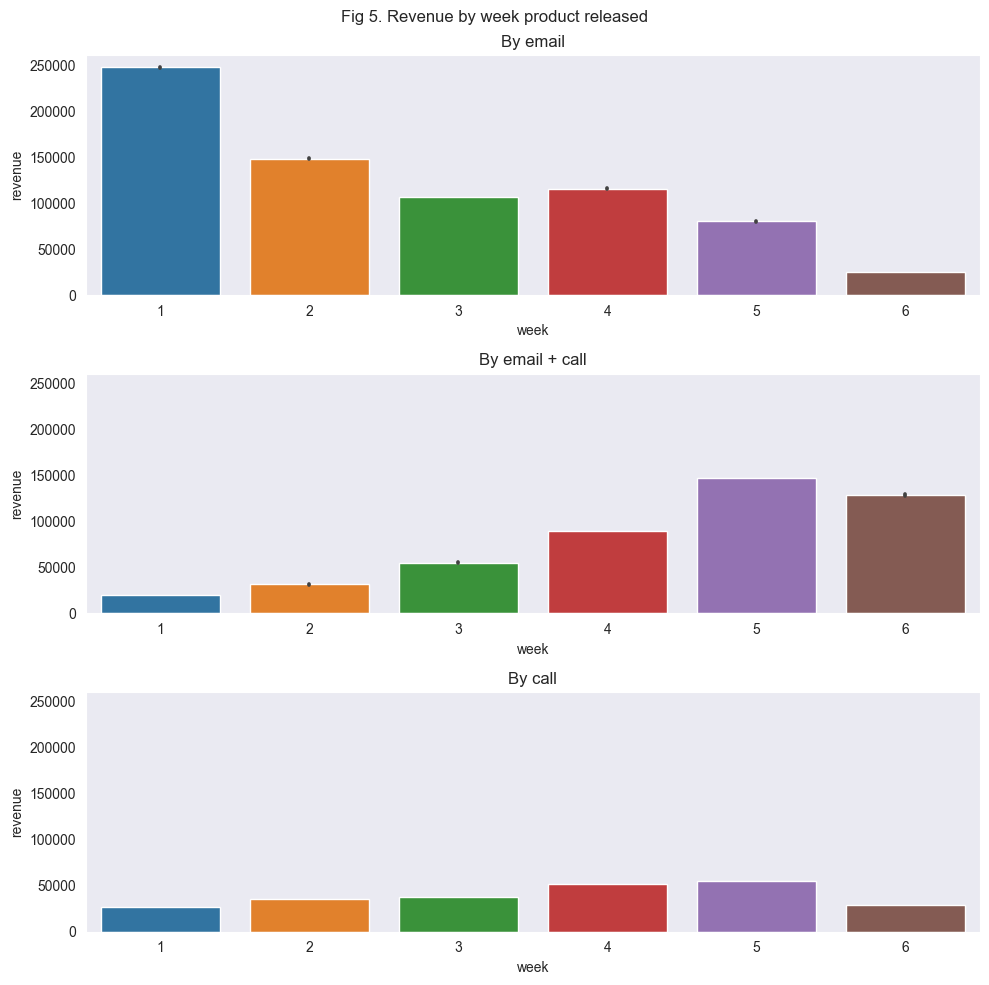

In [27]:
fig,  axs = plt.subplots(3,1, sharey=True, figsize=(10,10))
fig.suptitle('Fig 5. Revenue by week product released')

sns.barplot(data=sales_by_email, x='week', y='revenue', ax=axs[0],estimator='sum')
axs[0].set_title('By email')
sns.barplot(data=sales_by_email_n_call, x='week', y='revenue',ax=axs[1], estimator='sum')
axs[1].set_title('By email + call')
sns.barplot(data=sales_by_call, x='week', y='revenue', ax=axs[2], estimator='sum')
axs[2].set_title('By call')
plt.tight_layout()
plt.show()

We can see more clearly how the revenue of each method is distributed by week after new line of product was launched. In particular, the revenue generated by customers who were announced about new line of products by email was the highest at the first week when new products were initially in stock, then gradually decreased in the latter weeks. There was a contrary direction in the customers behaviors who were educated by both email and call method, in details, the revenue climbed gradually by weeks and peaked at the fifth week started from when new line of products campaign was launched.

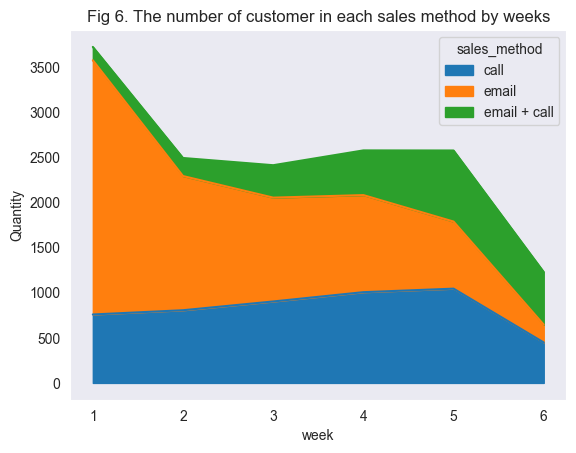

In [28]:
customer_by_week_med.plot(kind='area', stacked=True)
plt.xticks(rotation=0)
plt.title('Fig 6. The number of customer in each sales method by weeks')
plt.ylabel('Quantity')
plt.show()

We also saw that there are similar patterns in the number of customers in each group of method with each group's revenue perspectively. More specifically, the number of customers in email group went down by time from approximately 2800 customers in the first week to just nearly 200 customers in the last week of the campaign. In contrast, there was a rise in the number of customers of other remaining groups, in details, the measure in call group climbed up and peaked at around 1000 customers at the fifth week before decreased to approximately 450 customers in the sixth week, whereas that metric of combining method witnessed the similar trend and went on top at the fifth week with approximately 790 customers. Those points are also clear with the fact that the number of customers is higher, the likelihood of each method gains more revenue is higher.

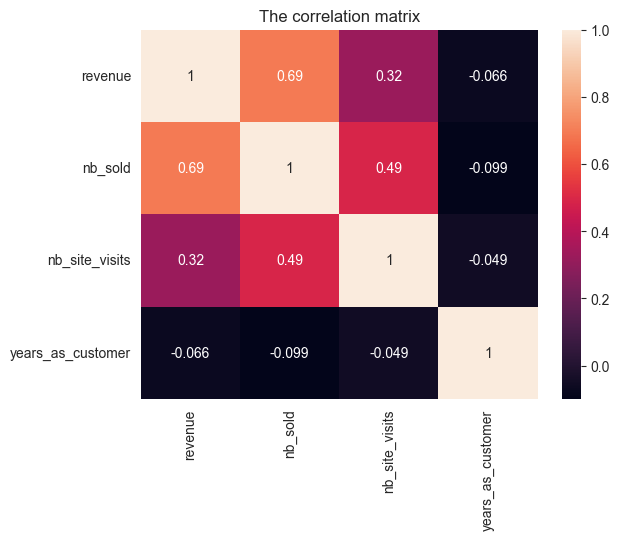

In [29]:
correlation = sales[['revenue', 'nb_sold','nb_site_visits', 'years_as_customer']]
sns.heatmap(correlation.corr(), annot=True)
plt.title('The correlation matrix')
plt.show()

The matrix shows that there is a strong positive correlation between the revenue and number of product was sold for each customer; a moderate positive correlation between number of sites each customer visits before buying new products and revenue, and number of products was sold.

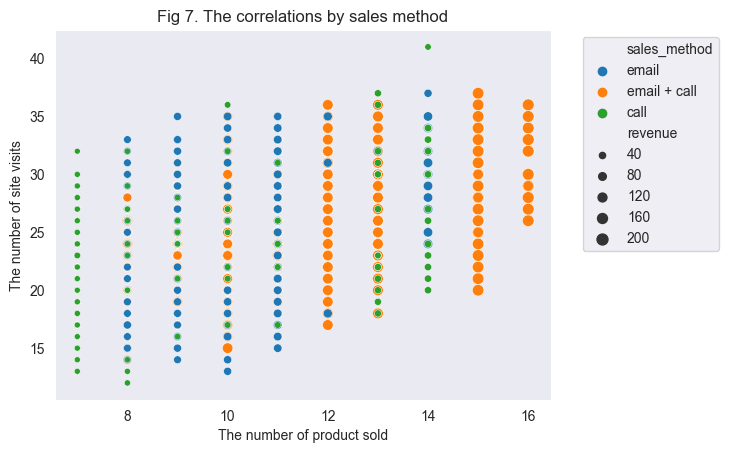

In [30]:
sns.scatterplot(data=sales, y='nb_site_visits', x='nb_sold', size='revenue', hue='sales_method')
plt.title('Fig 7. The correlations by sales method')
plt.ylabel('The number of site visits')
plt.xlabel('The number of product sold')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()

As we can see that Fig 7 vizualized the numbers in the correlations matrix: 
 + The number of products sold tend to be higher when the number of site visits in the latest 6 months of customers increased.
 + It seemed to be larger revenue when the number of products sold was higher.
 + The revenue tend to be larger when using the combing method.

In [31]:
sales.groupby('sales_method')['nb_sold'].sum()

sales_method
call            47187
email           72639
email + call    31444
Name: nb_sold, dtype: int64

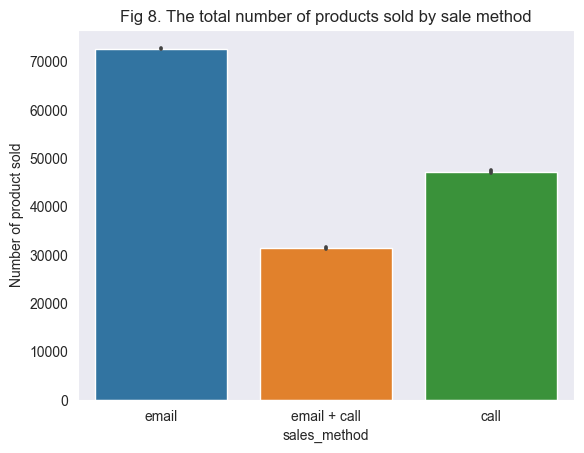

In [32]:
sns.barplot(data=sales, x='sales_method', y='nb_sold', estimator='sum')
plt.title('Fig 8. The total number of products sold by sale method')
plt.ylabel('Number of product sold')
plt.show()

Considering to the total number of product sold in group of customers who heard about new line of product via combining method is the least, around 31.500 products while that of customers educated by email method is still the highest figure with approximately 72.600 products.

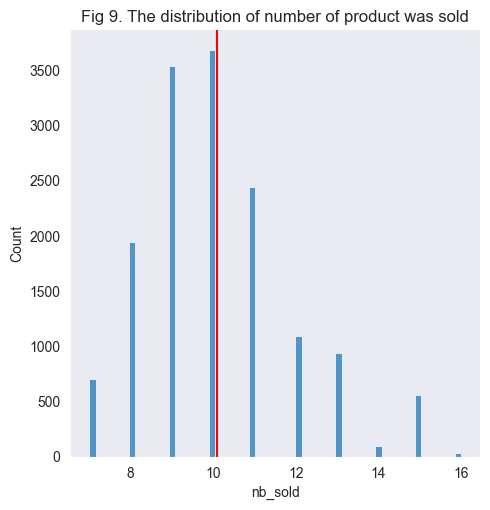

In [33]:
sns.displot(sales['nb_sold'])
plt.title('Fig 9. The distribution of number of product was sold')
plt.axvline(sales['nb_sold'].mean(), color='red')
plt.show()

In [34]:
avg_product_sold = sales.groupby('sales_method')['nb_sold'].mean().reset_index()
print(avg_product_sold)

   sales_method    nb_sold
0          call   9.509674
1         email   9.729306
2  email + call  12.225505


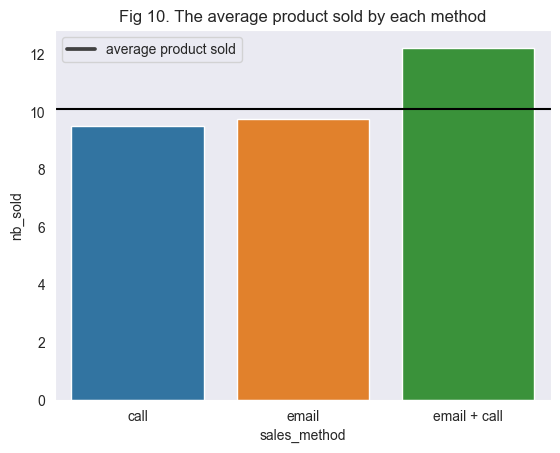

In [35]:
sns.barplot(data = avg_product_sold, x='sales_method', y='nb_sold')
plt.axhline(y=sales['nb_sold'].mean(), color='black')
plt.legend(['average product sold'])
plt.title('Fig 10. The average product sold by each method')
plt.show()

Fig 9. shows the frequency of the number of new product was sold, about 10 products is the most seen value in the number of product was sold while Fig 10. found out that the average product sold for each customer, people who are educated by combining method tends to buy more products (approxiamtely 12 products/customers) than customers in the remaining groups which numbers are both below the mean products was sold for a customer of whole dataset (10 products/customers).
-This is the second metric that business should monitor, _the average number of product a customer purchase_ the higher value of this metric, the more products were sold for a customer. The current value of dataset is around 10.

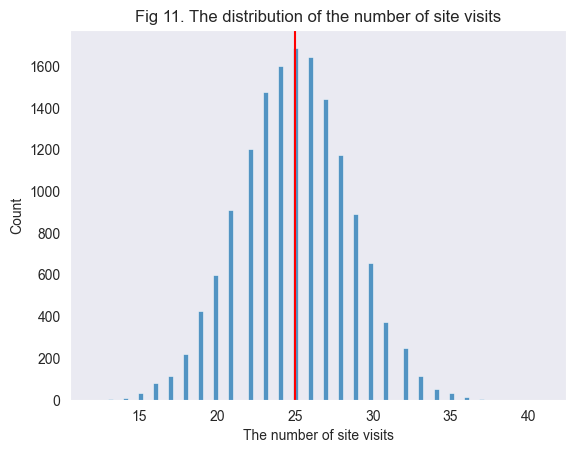

In [36]:
sns.histplot(data=sales, x='nb_site_visits')
plt.axvline(sales['nb_site_visits'].mean(), color='red')
plt.title('Fig 11. The distribution of the number of site visits')
plt.xlabel('The number of site visits')
plt.show()

In [37]:
avg_site_visits = sales.groupby('sales_method')['nb_site_visits'].mean().reset_index()
print(avg_site_visits)

   sales_method  nb_site_visits
0          call       24.423821
1         email       24.754353
2  email + call       26.771384


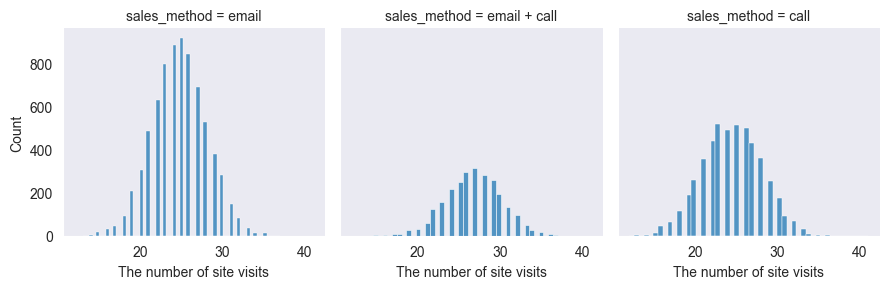

In [38]:
facet = sns.FacetGrid(sales, col='sales_method')
facet.map(sns.histplot, 'nb_site_visits')
facet.set_xlabels('The number of site visits')

Fig 11 point out that the average number site visits per customer was about 25 sites, whereas only that number of combining method was higher, with nearly 27 sites. This means that each customer educated by combining method tends to visit more sites.

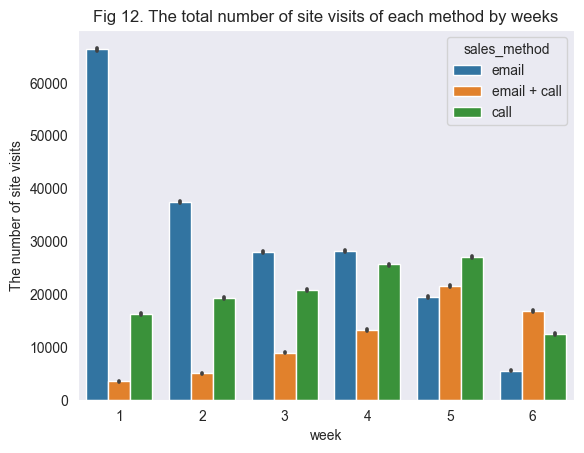

In [39]:
sns.barplot(data=sales, x='week', y='nb_site_visits', estimator='sum', hue='sales_method')
plt.title('Fig 12. The total number of site visits of each method by weeks')
plt.ylabel('The number of site visits')
plt.show()

We can see the similar trend in the total number of site visits of each method with its total revenue (Fig 5). In particular, the total number of site visits of customers educatad by email method witnessed a downward trend, ranking first in 4 consecutive weeks before was dominant by that of call method in the fifth week, while that metric of combining method shared the same direction with call method, and peaked at the sixth week of campaign.

In [40]:
rev_n_site = sales.groupby('sales_method')[['nb_site_visits','revenue']].sum()
rev_n_site_melting = rev_n_site.reset_index().melt(id_vars='sales_method')
print(rev_n_site_melting)

   sales_method        variable      value
0          call  nb_site_visits  121191.00
1         email  nb_site_visits  184816.00
2  email + call  nb_site_visits   68856.00
3          call         revenue  236445.16
4         email         revenue  724313.35
5  email + call         revenue  472730.95


In [41]:
rev_n_site['rev_per_site'] = rev_n_site['revenue'] / rev_n_site['nb_site_visits']
print(rev_n_site)

              nb_site_visits    revenue  rev_per_site
sales_method                                         
call                  121191  236445.16      1.951013
email                 184816  724313.35      3.919105
email + call           68856  472730.95      6.865501


In [42]:
avg_data_rev_site = sales['revenue'].sum() / sales['nb_site_visits'].sum()
print(avg_data_rev_site)

3.8240356076753375


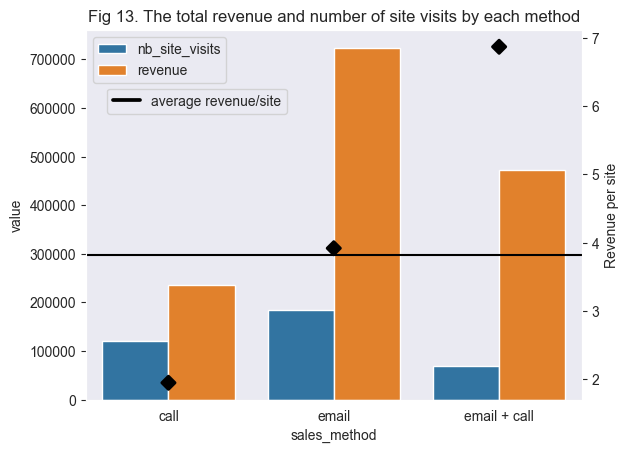

In [43]:
sns.barplot(data=rev_n_site_melting, x='sales_method', y='value', hue='variable')
plt.legend(loc='upper left')
plt.twinx()
sns.pointplot(data=rev_n_site.reset_index(), x='sales_method', y='rev_per_site', markers='D',color='black', join=False)
plt.title('Fig 13. The total revenue and number of site visits by each method')
plt.ylabel('Revenue per site')
plt.axhline(avg_data_rev_site, color='black')
plt.legend(['average revenue/site'], bbox_to_anchor=(0.42, 0.86))
plt.show()

Despite the lowest in the total number of site visits but the revenue per each site captured from customers educated by combining method was dominant to the remaining methods, with approximately 6.86 dollars per site, whereas this measures of call, and email methods were around 1.95 dollars, and 3.92 dollars respectively.
-The third metric should be observed is _the average revenue per site_, this metric indicates the average revenue gained from each site. The average value of metric of this current dataset is around 3.82 dollars per site.

In [44]:
n_site_vs_n_sold = sales.groupby('sales_method')[['nb_site_visits','nb_sold']].sum()
print(n_site_vs_n_sold)

              nb_site_visits  nb_sold
sales_method                         
call                  121191    47187
email                 184816    72639
email + call           68856    31444


In [45]:
n_site_vs_n_sold_melt = n_site_vs_n_sold.reset_index().melt(id_vars='sales_method')
print(n_site_vs_n_sold_melt)

   sales_method        variable   value
0          call  nb_site_visits  121191
1         email  nb_site_visits  184816
2  email + call  nb_site_visits   68856
3          call         nb_sold   47187
4         email         nb_sold   72639
5  email + call         nb_sold   31444


In [46]:
avg_n_visits_per_product = (n_site_vs_n_sold['nb_site_visits'] / n_site_vs_n_sold['nb_sold']).reset_index()
print(avg_n_visits_per_product)

   sales_method         0
0          call  2.568313
1         email  2.544308
2  email + call  2.189798


In [47]:
avg_data_site_product = sales['nb_site_visits'].sum() / sales['nb_sold'].sum()
print(avg_data_site_product)

2.4781053744959345


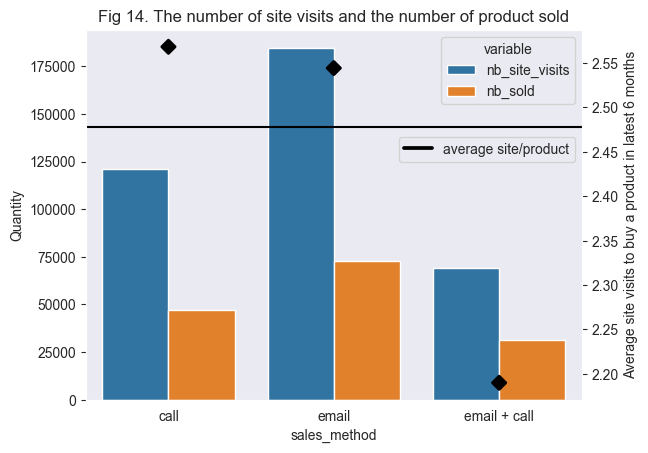

In [48]:
sns.barplot(data=n_site_vs_n_sold_melt, x='sales_method', y='value', hue='variable')
plt.ylabel('Quantity')
plt.twinx()
sns.pointplot(data=avg_n_visits_per_product.reset_index(), x='sales_method', y=0,join=False, color='black', markers='D')
plt.ylabel('Average site visits to buy a product in latest 6 months')
plt.title('Fig 14. The number of site visits and the number of product sold')
plt.axhline(avg_data_site_product, color='black')
plt.legend(['average site/product'], bbox_to_anchor=(1.0, 0.73))
plt.show()

The chart shows us a clearer statement that there is a moderate positive correlation between number of sites which customers visited before buying new products and the number of products were sold, those measures of customers educated by email both ranked the first with approximately 185000 site visits and around 72600 products was sold in total. Also, the total number of number site visits by call method stood at second place with around 121000 sites while the total number of new products sold of that stood at the same position , reaching around 47000 products. Despite stading at the bottom of table in both total number of site visits (nearly 69000) and total number of new products were sold (around 31500), but about examining the measure of the average number of sites that customers visited to purchase a new product in the latest 6 months, the combining method surprisingly stood the first place with just 2.19 sites/product, followed by email methods' metric which was about 2.54 sites/product.
-This is other metric which the business should be observed, this lower value means the customer no need to visit more site to buy product. The current average of dataset is approximately 2.48 sites.

In [49]:
num_Z_cust = len(sales[sales['years_as_customer'] < 6])
num_Y_cust = len(sales.loc[np.where((sales['years_as_customer'] >= 6) & (sales['years_as_customer'] <= 20))])
num_X_cust = len(sales[sales['years_as_customer'] > 20])

In [50]:
cust_frac = [num_Z_cust / len(sales), num_Y_cust / len(sales), num_X_cust / len(sales)]
cust_percent = [round(i * 100, 1) for i in cust_frac]
labels = ['0-5 years','6-20 years','> 20 years']
print(cust_percent)

[66.9, 31.4, 1.7]


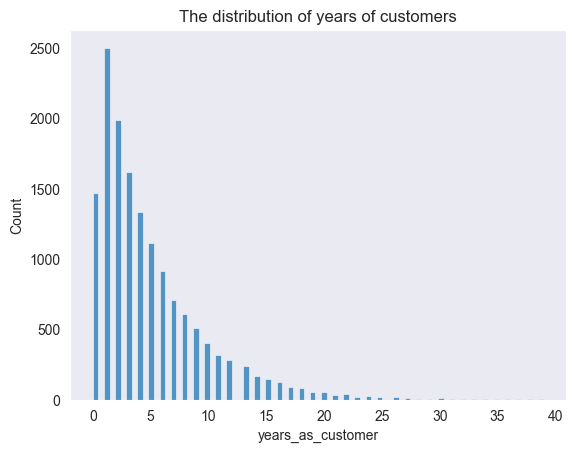

In [51]:
sns.histplot(data=sales['years_as_customer'])
plt.title('The distribution of years of customers')
plt.show()

The number of 0-5 years of customers captured a large quantity of distribution while the people being customers of the Pens and Printers from 20 years are quite small.

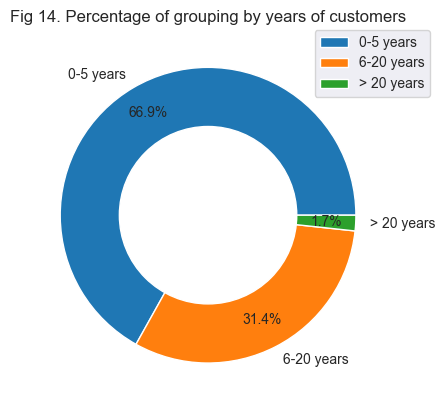

In [52]:
plt.pie(cust_percent, labels=labels, pctdistance=0.8, autopct='%1.1f%%')
circle = plt.Circle((0,0), 0.6, fc='white')
circle_fig = plt.gcf()
circle_fig.gca().add_artist(circle)
plt.title('Fig 14. Percentage of grouping by years of customers')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.12,1.02))
plt.show()

In particular, around 31,4% of current total customers have already had 6-20 years relationship with Pens and Printers, whereas the percentage of long-lasting more than 2 decades accounted just around 1.7%, and the majority of current customers have long-lasting relationships with the company in a period of time from 0-5 years, holding up to 66,9%.

In [53]:
customer_by_categories = sales.groupby(['sales_method', 'cust_category'])['revenue', 'customer_id'].agg({'revenue':'sum','customer_id':'count'}).unstack(level=-1)
print(customer_by_categories)

                 revenue                    ...       customer_id                   
cust_category 1-10 years less than 1 years  ... less than 1 years more than 10 years
sales_method                                ...                                     
call           186074.19          20594.98  ...               417                642
email          568443.52          70449.26  ...               718                897
email + call   361559.88          62185.14  ...               336                275

[3 rows x 6 columns]


In [54]:
by_state = sales.groupby('state')[['customer_id','revenue']].agg({'customer_id':'count','revenue':'sum'}).rename(columns={'customer_id':'num_customer'}).reset_index()
top_num_cust_by_state = by_state.sort_values(by='num_customer', ascending=False).head(10)

In [55]:
top_revenue_by_state = by_state.sort_values(by='revenue', ascending=False).head(10)
top_revenue_by_state

,state,num_customer,revenue
4,California,1872,176877.68
42,Texas,1187,114691.85
31,New York,965,90652.01
8,Florida,904,86781.73
12,Illinois,617,57579.96
37,Pennsylvania,598,57222.27
34,Ohio,566,53372.94
21,Michigan,498,48274.23
9,Georgia,489,46946.44
32,North Carolina,459,42035.06


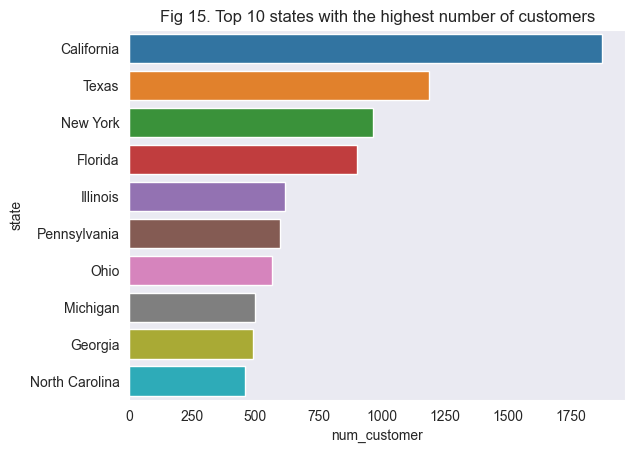

In [56]:
sns.barplot(data=top_num_cust_by_state, y='state', x='num_customer')
plt.title('Fig 15. Top 10 states with the highest number of customers')
plt.show()

10 of 50 states having the highest number of customers accounted for more than a half of total customers, in particular, there are  2 states that have above one thousand customers, including California and Texas, with 1872 and 1187 customers respectively while 965 customers, and 904 customers have shipping addresses at New York and Florida in turn.

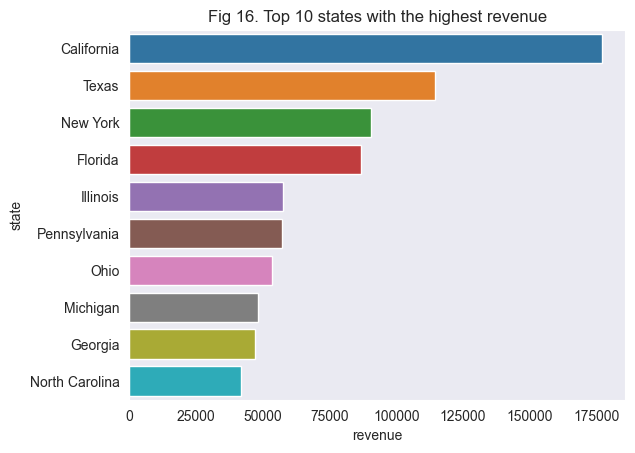

In [57]:
sns.barplot(data=top_revenue_by_state, x='revenue', y='state')
plt.title('Fig 16. Top 10 states with the highest revenue')
plt.show()

There was no differences in the order of top 10 states which had the highest revenue compared to those number of customers. California ranked first with total of around 176000 dollars, Texas followed with nearly 115000 dollars.

Final Summary:
 Despite the lowest number of customer, the combining method contributed the second highest the total revenue to the business. Also:
 + Each customer educated by combining method are created the highest revenue with 184 dollars/person.
 + Each customer educated by combining method purchase more product than any other methods, and average number of current dataset, with nearly 12 product/person.
 + The average revenue of each site where customers educated by combining method visited is higher than any other methods, about 6.86 dollars per site.
 + Each customers educated by combining method visited sites more than others educated by call or email (nearly 27 sites/person), but they just need to visit 2.2 sites to purchase a new product which is the lowest compared to other methods.
With all of above findings, I recommend the combining method should be the suitable approach for the business.